Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
⚙️ Using device: cpu
📂 Class names: ['Fuchka', 'Kalavuna', 'Kichuri', 'Mango Pudding', 'Misty', 'Muri Canacur', 'Pitha', 'Pizza', 'Puri', 'Rosmalai']
🔎 Prediction for '3-100-_jpg.rf.55301ec5663881e4e6f1e3b449685265.jpg': Fuchka


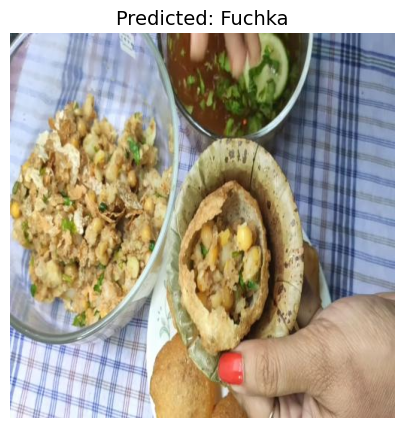

In [ ]:
# ✅ Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# ✅ Imports
import os
import torch
import torch.nn as nn
from torchvision import transforms, datasets
from PIL import Image
import matplotlib.pyplot as plt

# ✅ Auto-detect classes from the original training folder
def get_class_names(data_path):
    dataset = datasets.ImageFolder(data_path)
    return dataset.classes

# ✅ Define the exact same model as during training
class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.net = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(128 * 28 * 28, 256), nn.ReLU(),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        return self.net(x)

# ✅ Image prediction function + show image and predicted label
def predict_image(model, image_path, class_names, device):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.5]*3, [0.5]*3)
    ])

    image = Image.open(image_path).convert('RGB')
    image_tensor = transform(image).unsqueeze(0).to(device)

    model.eval()
    with torch.no_grad():
        output = model(image_tensor)
        _, predicted = output.max(1)
        predicted_class = class_names[predicted.item()]

    print(f"🔎 Prediction for '{os.path.basename(image_path)}': {predicted_class}")

    # ✅ Display the image with predicted label
    plt.figure(figsize=(5,5))
    plt.imshow(image)
    plt.title(f"Predicted: {predicted_class}", fontsize=14)
    plt.axis('off')
    plt.show()

# ✅ Inference Pipeline
def run_inference():
    # Path setup
    data_path = "/content/drive/MyDrive/Dataset/Dataset/Sami"  # must match training dataset
    model_path = "/content/drive/MyDrive/Dataset/Dataset/Samifood_model.pth"
    test_image_path = "/content/drive/MyDrive/Dataset/Dataset/Sami/Fuchka/3-100-_jpg.rf.55301ec5663881e4e6f1e3b449685265.jpg"  # 🔁 change to your test image

    # Get device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"⚙️ Using device: {device}")

    # Load class names (must match training set)
    class_names = get_class_names(data_path)
    print(f"📂 Class names: {class_names}")

    # Load model
    model = SimpleCNN(num_classes=len(class_names))
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.to(device)

    # Predict test image
    predict_image(model, test_image_path, class_names, device)

# ✅ Run
run_inference()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
⚙️ Using device: cpu
📦 Total images found: 1107 across 10 classes: ['Fuchka', 'Kalavuna', 'Kichuri', 'Mango Pudding', 'Misty', 'Muri Canacur', 'Pitha', 'Pizza', 'Puri', 'Rosmalai']
🟢 Training images: 885
📊 Training split distribution:
   📁 Fuchka: 100 images
   📁 Kalavuna: 19 images
   📁 Kichuri: 140 images
   📁 Mango Pudding: 12 images
   📁 Misty: 293 images
   📁 Muri Canacur: 150 images
   📁 Pitha: 19 images
   📁 Pizza: 31 images
   📁 Puri: 107 images
   📁 Rosmalai: 14 images

🔵 Validation images: 222
📊 Validation split distribution:
   📁 Fuchka: 29 images
   📁 Kalavuna: 2 images
   📁 Kichuri: 31 images
   📁 Mango Pudding: 2 images
   📁 Misty: 68 images
   📁 Muri Canacur: 42 images
   📁 Pitha: 6 images
   📁 Pizza: 4 images
   📁 Puri: 37 images
   📁 Rosmalai: 1 images

⏱ Data loading time: 28.48 seconds


Epoch 1/50 - Training: 100%|██████████| 28/28 [02:38<00:00,  5.68s/it]


Epoch 1: Train Loss = 1.1686, Train Acc = 65.88%, Val Acc = 90.54%, Time = 178.83 sec


Epoch 2/50 - Training: 100%|██████████| 28/28 [02:37<00:00,  5.61s/it]


Epoch 2: Train Loss = 0.3141, Train Acc = 91.30%, Val Acc = 94.14%, Time = 176.27 sec


Epoch 3/50 - Training: 100%|██████████| 28/28 [02:37<00:00,  5.64s/it]


Epoch 3: Train Loss = 0.1008, Train Acc = 96.95%, Val Acc = 94.59%, Time = 176.18 sec


Epoch 4/50 - Training: 100%|██████████| 28/28 [02:38<00:00,  5.65s/it]


Epoch 4: Train Loss = 0.0477, Train Acc = 98.42%, Val Acc = 94.14%, Time = 178.45 sec


Epoch 5/50 - Training: 100%|██████████| 28/28 [02:39<00:00,  5.68s/it]


Epoch 5: Train Loss = 0.0135, Train Acc = 99.66%, Val Acc = 94.14%, Time = 178.73 sec


Epoch 6/50 - Training: 100%|██████████| 28/28 [02:38<00:00,  5.65s/it]


Epoch 6: Train Loss = 0.0014, Train Acc = 100.00%, Val Acc = 96.40%, Time = 177.47 sec


Epoch 7/50 - Training: 100%|██████████| 28/28 [02:39<00:00,  5.71s/it]


Epoch 7: Train Loss = 0.0004, Train Acc = 100.00%, Val Acc = 95.50%, Time = 178.38 sec


Epoch 8/50 - Training: 100%|██████████| 28/28 [02:39<00:00,  5.71s/it]


Epoch 8: Train Loss = 0.0002, Train Acc = 100.00%, Val Acc = 95.50%, Time = 178.50 sec


Epoch 9/50 - Training: 100%|██████████| 28/28 [02:39<00:00,  5.68s/it]


Epoch 9: Train Loss = 0.0001, Train Acc = 100.00%, Val Acc = 95.50%, Time = 179.10 sec


Epoch 10/50 - Training: 100%|██████████| 28/28 [02:39<00:00,  5.69s/it]


Epoch 10: Train Loss = 0.0001, Train Acc = 100.00%, Val Acc = 95.50%, Time = 179.20 sec


Epoch 11/50 - Training: 100%|██████████| 28/28 [02:38<00:00,  5.66s/it]


Epoch 11: Train Loss = 0.0001, Train Acc = 100.00%, Val Acc = 95.95%, Time = 177.85 sec


Epoch 12/50 - Training: 100%|██████████| 28/28 [02:39<00:00,  5.69s/it]


Epoch 12: Train Loss = 0.0001, Train Acc = 100.00%, Val Acc = 95.95%, Time = 177.77 sec


Epoch 13/50 - Training: 100%|██████████| 28/28 [02:40<00:00,  5.72s/it]


Epoch 13: Train Loss = 0.0001, Train Acc = 100.00%, Val Acc = 95.95%, Time = 179.20 sec


Epoch 14/50 - Training: 100%|██████████| 28/28 [02:40<00:00,  5.72s/it]


Epoch 14: Train Loss = 0.0000, Train Acc = 100.00%, Val Acc = 95.95%, Time = 178.90 sec


Epoch 15/50 - Training: 100%|██████████| 28/28 [02:39<00:00,  5.69s/it]


Epoch 15: Train Loss = 0.0000, Train Acc = 100.00%, Val Acc = 95.50%, Time = 179.37 sec


Epoch 16/50 - Training: 100%|██████████| 28/28 [02:39<00:00,  5.69s/it]


Epoch 16: Train Loss = 0.0000, Train Acc = 100.00%, Val Acc = 95.50%, Time = 179.03 sec


Epoch 17/50 - Training: 100%|██████████| 28/28 [02:38<00:00,  5.67s/it]


Epoch 17: Train Loss = 0.0000, Train Acc = 100.00%, Val Acc = 95.50%, Time = 177.87 sec


Epoch 18/50 - Training: 100%|██████████| 28/28 [02:40<00:00,  5.72s/it]


Epoch 18: Train Loss = 0.0000, Train Acc = 100.00%, Val Acc = 95.95%, Time = 179.12 sec


Epoch 19/50 - Training: 100%|██████████| 28/28 [02:40<00:00,  5.73s/it]


Epoch 19: Train Loss = 0.0000, Train Acc = 100.00%, Val Acc = 95.95%, Time = 178.79 sec


Epoch 20/50 - Training: 100%|██████████| 28/28 [02:40<00:00,  5.74s/it]


Epoch 20: Train Loss = 0.0000, Train Acc = 100.00%, Val Acc = 95.95%, Time = 179.86 sec


Epoch 21/50 - Training: 100%|██████████| 28/28 [02:39<00:00,  5.71s/it]


Epoch 21: Train Loss = 0.0000, Train Acc = 100.00%, Val Acc = 95.95%, Time = 179.40 sec


Epoch 22/50 - Training: 100%|██████████| 28/28 [02:39<00:00,  5.69s/it]


Epoch 22: Train Loss = 0.0000, Train Acc = 100.00%, Val Acc = 95.95%, Time = 179.39 sec


Epoch 23/50 - Training: 100%|██████████| 28/28 [02:42<00:00,  5.80s/it]


Epoch 23: Train Loss = 0.0000, Train Acc = 100.00%, Val Acc = 95.95%, Time = 182.16 sec


Epoch 24/50 - Training: 100%|██████████| 28/28 [02:46<00:00,  5.94s/it]


Epoch 24: Train Loss = 0.0000, Train Acc = 100.00%, Val Acc = 95.50%, Time = 185.34 sec


Epoch 25/50 - Training: 100%|██████████| 28/28 [02:49<00:00,  6.05s/it]


Epoch 25: Train Loss = 0.0000, Train Acc = 100.00%, Val Acc = 95.50%, Time = 188.30 sec


Epoch 26/50 - Training: 100%|██████████| 28/28 [02:51<00:00,  6.12s/it]


Epoch 26: Train Loss = 0.0000, Train Acc = 100.00%, Val Acc = 95.50%, Time = 190.53 sec


Epoch 27/50 - Training: 100%|██████████| 28/28 [02:51<00:00,  6.11s/it]


Epoch 27: Train Loss = 0.0000, Train Acc = 100.00%, Val Acc = 95.95%, Time = 190.67 sec


Epoch 28/50 - Training: 100%|██████████| 28/28 [02:51<00:00,  6.12s/it]


Epoch 28: Train Loss = 0.0000, Train Acc = 100.00%, Val Acc = 95.50%, Time = 189.93 sec


Epoch 29/50 - Training: 100%|██████████| 28/28 [02:53<00:00,  6.19s/it]


Epoch 29: Train Loss = 0.0000, Train Acc = 100.00%, Val Acc = 95.50%, Time = 193.29 sec


Epoch 30/50 - Training: 100%|██████████| 28/28 [02:48<00:00,  6.02s/it]


Epoch 30: Train Loss = 0.0000, Train Acc = 100.00%, Val Acc = 95.50%, Time = 188.36 sec


Epoch 31/50 - Training: 100%|██████████| 28/28 [02:46<00:00,  5.95s/it]


Epoch 31: Train Loss = 0.0000, Train Acc = 100.00%, Val Acc = 95.50%, Time = 185.51 sec


Epoch 32/50 - Training: 100%|██████████| 28/28 [02:47<00:00,  5.97s/it]


Epoch 32: Train Loss = 0.0000, Train Acc = 100.00%, Val Acc = 95.50%, Time = 185.89 sec


Epoch 33/50 - Training: 100%|██████████| 28/28 [02:48<00:00,  6.02s/it]


Epoch 33: Train Loss = 0.0000, Train Acc = 100.00%, Val Acc = 95.05%, Time = 188.96 sec


Epoch 34/50 - Training: 100%|██████████| 28/28 [02:49<00:00,  6.06s/it]


Epoch 34: Train Loss = 0.0000, Train Acc = 100.00%, Val Acc = 95.50%, Time = 188.59 sec


Epoch 35/50 - Training: 100%|██████████| 28/28 [02:47<00:00,  5.99s/it]


Epoch 35: Train Loss = 0.0000, Train Acc = 100.00%, Val Acc = 95.05%, Time = 187.41 sec


Epoch 36/50 - Training: 100%|██████████| 28/28 [02:45<00:00,  5.92s/it]


Epoch 36: Train Loss = 0.0000, Train Acc = 100.00%, Val Acc = 94.59%, Time = 184.12 sec


Epoch 37/50 - Training: 100%|██████████| 28/28 [02:45<00:00,  5.92s/it]


Epoch 37: Train Loss = 0.0000, Train Acc = 100.00%, Val Acc = 94.59%, Time = 184.37 sec


Epoch 38/50 - Training: 100%|██████████| 28/28 [02:46<00:00,  5.95s/it]


Epoch 38: Train Loss = 0.0000, Train Acc = 100.00%, Val Acc = 94.59%, Time = 185.91 sec


Epoch 39/50 - Training: 100%|██████████| 28/28 [02:46<00:00,  5.96s/it]


Epoch 39: Train Loss = 0.0000, Train Acc = 100.00%, Val Acc = 94.59%, Time = 186.42 sec


Epoch 40/50 - Training: 100%|██████████| 28/28 [02:48<00:00,  6.01s/it]


Epoch 40: Train Loss = 0.0000, Train Acc = 100.00%, Val Acc = 94.59%, Time = 187.18 sec


Epoch 41/50 - Training: 100%|██████████| 28/28 [02:47<00:00,  6.00s/it]


Epoch 41: Train Loss = 0.0000, Train Acc = 100.00%, Val Acc = 94.59%, Time = 187.84 sec


Epoch 42/50 - Training: 100%|██████████| 28/28 [02:49<00:00,  6.06s/it]


Epoch 42: Train Loss = 0.0000, Train Acc = 100.00%, Val Acc = 94.59%, Time = 188.70 sec


Epoch 43/50 - Training: 100%|██████████| 28/28 [02:48<00:00,  6.01s/it]


Epoch 43: Train Loss = 0.0000, Train Acc = 100.00%, Val Acc = 94.59%, Time = 188.27 sec


Epoch 44/50 - Training: 100%|██████████| 28/28 [02:47<00:00,  6.00s/it]


Epoch 44: Train Loss = 0.0000, Train Acc = 100.00%, Val Acc = 94.59%, Time = 186.65 sec


Epoch 45/50 - Training: 100%|██████████| 28/28 [02:49<00:00,  6.05s/it]


Epoch 45: Train Loss = 0.0000, Train Acc = 100.00%, Val Acc = 94.59%, Time = 189.15 sec


Epoch 46/50 - Training: 100%|██████████| 28/28 [02:46<00:00,  5.95s/it]


Epoch 46: Train Loss = 0.0000, Train Acc = 100.00%, Val Acc = 94.59%, Time = 185.47 sec


Epoch 47/50 - Training: 100%|██████████| 28/28 [02:48<00:00,  6.02s/it]


Epoch 47: Train Loss = 0.0000, Train Acc = 100.00%, Val Acc = 94.59%, Time = 188.08 sec


Epoch 48/50 - Training: 100%|██████████| 28/28 [02:48<00:00,  6.03s/it]


Epoch 48: Train Loss = 0.0000, Train Acc = 100.00%, Val Acc = 94.59%, Time = 188.37 sec


Epoch 49/50 - Training: 100%|██████████| 28/28 [02:49<00:00,  6.06s/it]


Epoch 49: Train Loss = 0.0000, Train Acc = 100.00%, Val Acc = 94.59%, Time = 188.33 sec


Epoch 50/50 - Training: 100%|██████████| 28/28 [02:49<00:00,  6.06s/it]


Epoch 50: Train Loss = 0.0000, Train Acc = 100.00%, Val Acc = 94.59%, Time = 189.22 sec
⏱ Total training time: 9180.68 seconds
✅ Model saved at: /content/drive/MyDrive/Dataset/Dataset/Samifood_model.pth


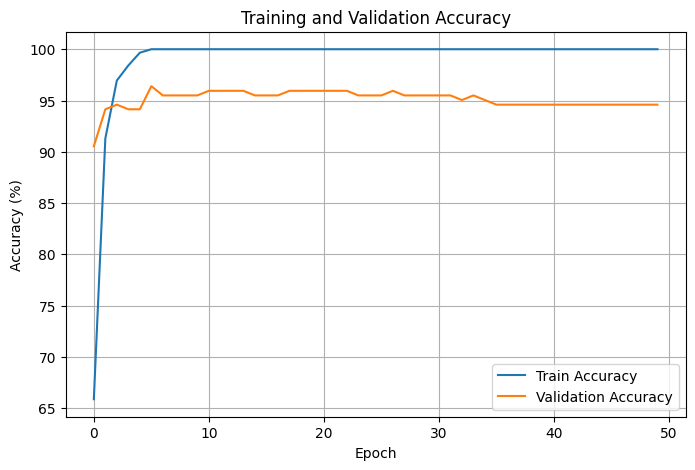


📊 Validation Metrics:
Accuracy: 0.9459
Precision: 0.9406
Recall: 0.9459
Confusion Matrix:
[[26  0  0  0  1  0  1  1  0  0]
 [ 0  1  0  0  0  1  0  0  0  0]
 [ 0  0 31  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  1  0]
 [ 0  0  0  0 67  0  0  1  0  0]
 [ 1  0  0  0  0 40  0  0  1  0]
 [ 0  0  0  0  1  0  4  0  0  1]
 [ 0  0  0  0  0  0  0  4  0  0]
 [ 0  0  0  0  0  0  0  0 37  0]
 [ 0  0  0  0  0  0  0  0  1  0]]
ROC AUC: 0.9989


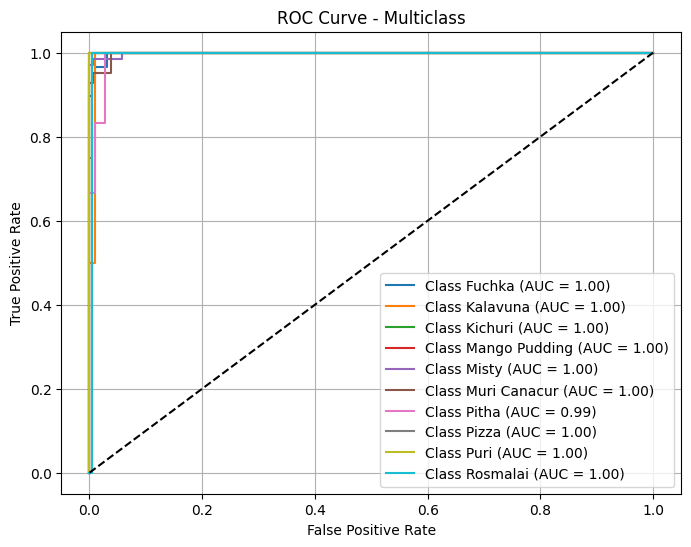

🔎 Prediction for 'IMG20250608133835.jpg': Mango Pudding
⏱ Prediction time: 0.2318 seconds


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Imports
import os
import time
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
from tqdm import tqdm
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    confusion_matrix, roc_auc_score, roc_curve
)
import numpy as np
from collections import Counter

# Count and print number of images per class in a dataset split
def count_labels(dataset, class_names, split_name=""):
    labels = [sample[1] for sample in dataset]  # extract label index
    label_counts = Counter(labels)
    print(f"📊 {split_name} split distribution:")
    for idx in range(len(class_names)):
        print(f"   📁 {class_names[idx]}: {label_counts[idx]} images")
    print()

# Load dataset and print total images
def load_food_dataset(base_path="/content/drive/MyDrive/Dataset/Dataset/Sami", img_size=224, batch_size=32, split_ratio=0.8):
    transform = transforms.Compose([
        transforms.Resize((img_size, img_size)),
        transforms.ToTensor(),
        transforms.Normalize([0.5]*3, [0.5]*3)
    ])

    full_dataset = datasets.ImageFolder(root=base_path, transform=transform)
    class_names = full_dataset.classes
    total_images = len(full_dataset)
    print(f"📦 Total images found: {total_images} across {len(class_names)} classes: {class_names}")

    train_size = int(split_ratio * total_images)
    val_size = total_images - train_size
    train_set, val_set = random_split(full_dataset, [train_size, val_size])

    print(f"🟢 Training images: {len(train_set)}")
    count_labels(train_set, class_names, split_name="Training")

    print(f"🔵 Validation images: {len(val_set)}")
    count_labels(val_set, class_names, split_name="Validation")

    train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_set, batch_size=batch_size, shuffle=False)

    return train_loader, val_loader, class_names

# Simple CNN
class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.net = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(128 * 28 * 28, 256), nn.ReLU(),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        return self.net(x)

# Basic evaluation (for val accuracy only)
def evaluate_model(model, val_loader, device):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
    return 100. * correct / total

# Detailed validation metrics
def evaluate_model_detailed(model, val_loader, device):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average='weighted', zero_division=0)
    recall = recall_score(all_labels, all_preds, average='weighted', zero_division=0)
    cm = confusion_matrix(all_labels, all_preds)

    try:
        probs = []
        with torch.no_grad():
            for images, _ in val_loader:
                images = images.to(device)
                outputs = model(images)
                probs.append(torch.softmax(outputs, dim=1).cpu().numpy())
        probs = np.vstack(probs)
        from sklearn.preprocessing import label_binarize
        labels_one_hot = label_binarize(all_labels, classes=list(range(probs.shape[1])))
        auc = roc_auc_score(labels_one_hot, probs, average='weighted', multi_class='ovr')
        roc_data_available = True
    except Exception as e:
        print(f"⚠️ Could not compute ROC AUC: {e}")
        auc = None
        roc_data_available = False

    return accuracy, precision, recall, cm, auc, roc_data_available, all_labels, all_preds, probs if roc_data_available else None

# Training function
def train_model(model, train_loader, val_loader, device, epochs=20, lr=0.001, save_path='model.pth'):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    train_acc_list = []
    val_acc_list = []

    start_time = time.time()
    for epoch in range(epochs):
        epoch_start = time.time()
        model.train()
        correct, total, train_loss = 0, 0, 0.0

        for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs} - Training"):
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * images.size(0)
            _, predicted = outputs.max(1)
            correct += predicted.eq(labels).sum().item()
            total += labels.size(0)

        train_acc = 100. * correct / total
        val_acc = evaluate_model(model, val_loader, device)

        train_acc_list.append(train_acc)
        val_acc_list.append(val_acc)

        epoch_end = time.time()
        print(f"Epoch {epoch+1}: Train Loss = {train_loss/total:.4f}, Train Acc = {train_acc:.2f}%, Val Acc = {val_acc:.2f}%, Time = {epoch_end - epoch_start:.2f} sec")

    total_time = time.time() - start_time
    print(f"⏱ Total training time: {total_time:.2f} seconds")

    torch.save(model.state_dict(), save_path)
    print(f"✅ Model saved at: {save_path}")

    plt.figure(figsize=(8,5))
    plt.plot(train_acc_list, label='Train Accuracy')
    plt.plot(val_acc_list, label='Validation Accuracy')
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy (%)")
    plt.title("Training and Validation Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()

# Predict one image
def predict_image(model, image_path, class_names, device):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.5]*3, [0.5]*3)
    ])

    image = Image.open(image_path).convert('RGB')
    image_tensor = transform(image).unsqueeze(0).to(device)

    model.eval()
    with torch.no_grad():
        output = model(image_tensor)
        _, predicted = output.max(1)
        predicted_class = class_names[predicted.item()]

    print(f"🔎 Prediction for '{os.path.basename(image_path)}': {predicted_class}")

# Main pipeline
def main():
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"⚙️ Using device: {device}")

    data_path = '/content/drive/MyDrive/Dataset/Dataset/Sami'
    model_save_path = '/content/drive/MyDrive/Dataset/Dataset/Samifood_model.pth'

    start_load = time.time()
    train_loader, val_loader, class_names = load_food_dataset(base_path=data_path)
    end_load = time.time()
    print(f"⏱ Data loading time: {end_load - start_load:.2f} seconds")

    model = SimpleCNN(num_classes=len(class_names)).to(device)

    train_model(model, train_loader, val_loader, device, epochs=50, lr=0.001, save_path=model_save_path)

    model.load_state_dict(torch.load(model_save_path, map_location=device))

    accuracy, precision, recall, cm, auc, roc_data_available, all_labels, all_preds, probs = evaluate_model_detailed(model, val_loader, device)

    print(f"\n📊 Validation Metrics:\nAccuracy: {accuracy:.4f}\nPrecision: {precision:.4f}\nRecall: {recall:.4f}")
    print("Confusion Matrix:")
    print(cm)

    if auc is not None:
        print(f"ROC AUC: {auc:.4f}")
        plt.figure(figsize=(8,6))
        for i in range(len(class_names)):
            fpr, tpr, _ = roc_curve(np.array(all_labels) == i, probs[:, i])
            plt.plot(fpr, tpr, label=f"Class {class_names[i]} (AUC = {roc_auc_score(np.array(all_labels) == i, probs[:, i]):.2f})")
        plt.plot([0,1],[0,1],'k--')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curve - Multiclass")
        plt.legend(loc='lower right')
        plt.grid(True)
        plt.show()
    else:
        print("ROC AUC curve not available.")

    test_image_path = f"{data_path}/Mango Pudding/IMG20250608133835.jpg"  # Change path as needed
    start_pred = time.time()
    predict_image(model, test_image_path, class_names, device)
    end_pred = time.time()
    print(f"⏱ Prediction time: {end_pred - start_pred:.4f} seconds")

if __name__ == "__main__":
    main()